In [1]:
from dataset_helpers import *
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np 
import faiss

### Flicker-8k dataset

In [1]:
pwd

'/home/ntnhu/projects/VideoFall-VBS2022/searching'

In [1]:
from dataset_helpers import *
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
DATASET_PATH

'/home/ntnhu/DCU/projects/object_detection/dataset/Flicker-8k'

In [3]:
data = dataset(src_path=DATASET_PATH, feature_path=FEATURE_PATH)
data.get_file_name()
data.preprocess_dataset(entire_dataset=False)
# data.load_dataset()
print("Features: ", data.features)

 10%|█         | 1/10 [00:00<00:01,  5.70it/s]

Preprocess a subset of the dataset...


100%|██████████| 10/10 [00:01<00:00,  7.94it/s]

Features:  None


In [3]:
query = "two people"
best_images = data.search_query(query, num_matches=10)
print("Length of features: ", len(data.features))
print("Best images: ", best_images)

Length of features:  8091
Best images:  [(0.2883, 8018), (0.2834, 5003), (0.2815, 844), (0.2798, 299), (0.2747, 7635), (0.2734, 125), (0.2727, 1396), (0.2712, 6869), (0.2703, 2844), (0.2698, 4334)]


In [4]:
# def plot_figure(images, subplot_size=(5, 3), savefig=False):
#     fig = plt.figure(figsize=(15, 15))
#     max_len = min(len(images), subplot_size[0]*subplot_size[1])

#     for cnt, data in enumerate(images[:max_len]):
#     #     print(data)
#         y = fig.add_subplot(subplot_size[0], subplot_size[1], cnt+1)
# #         img = mpimg.imread(os.path.join(cluster_path, data))
# #         img = mpimg.imread(data)
#         img = Image.open(data)
#         y.imshow(img)
#         plt.title(data.split('/')[-1])
#         y.axes.get_xaxis().set_visible(False)
#         y.axes.get_yaxis().set_visible(False)

#     if savefig:
#         fig.savefig(os.path.join(path, f'{cluster_name}.png'))

In [4]:
len(best_images)

10

In [5]:
best_images

[(0.2883, 8018),
 (0.2834, 5003),
 (0.2815, 844),
 (0.2798, 299),
 (0.2747, 7635),
 (0.2734, 125),
 (0.2727, 1396),
 (0.2712, 6869),
 (0.2703, 2844),
 (0.2698, 4334)]

In [6]:
temp = [data.image_names[item[1]] for item in best_images]
temp

['/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/923550133_ac9d7a2932.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3312096605_f458757418.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2038662925_f4fa8c2534.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/1332208215_fa824f6659.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/527272653_8a5bd818e5.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/1131804997_177c3c0640.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2273028514_d7b584f73d.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3687062281_e62f70baf3.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/2752230113_b5dab6f0f1.jpg',
 '/home/ntnhu/DCU/others/object_detection/dataset/Flicker-8k/Images/3173157541_70b16b4318.jpg']

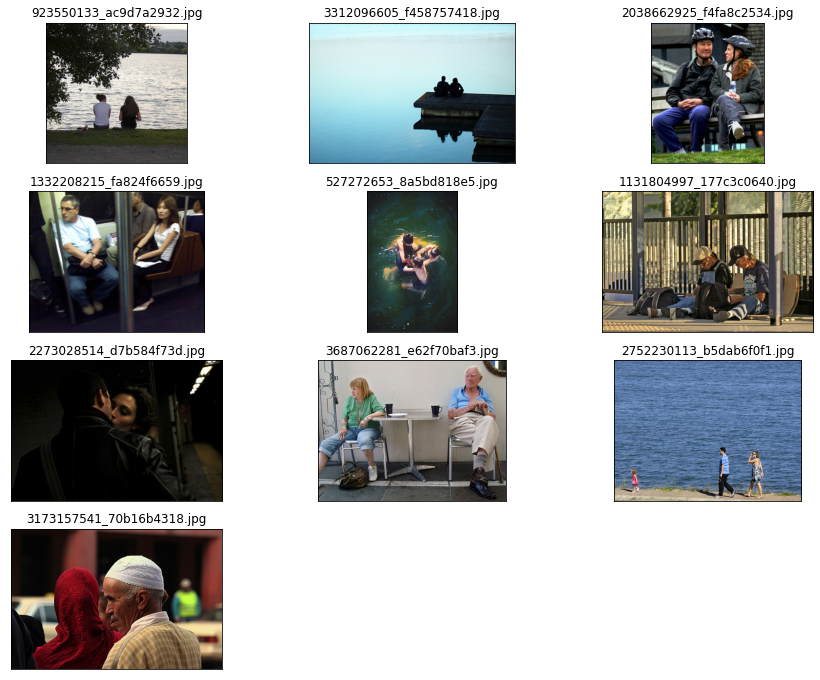

In [7]:
data.display_results(best_images)

### Using V3C1 sample dataset

In [2]:
DATASET_PATH

'/mnt/SEAGATE/root/V3C1/resized_keyframes'

In [3]:
# Whether you wanna generate new features
generate_features = True


print("Dataset name: ", DATASET_NAME)
clip = CLIPSearchEngine(src_path=DATASET_PATH, feature_path=FEATURE_PATH, generate_features=generate_features)

Dataset name:  V3C1


In [4]:
# data = dataset(src_path=DATASET_PATH, feature_path=FEATURE_PATH, generate_features=generate_features)
# data.get_file_name()

In [5]:
clip.dataset.src_path

'/mnt/SEAGATE/root/V3C1/resized_keyframes'

In [6]:
clip.dataset.get_file_name()

In [7]:
# clip.encode_dataset(entire_dataset=False)

#### Adjust the encoding function

In [6]:
import joblib

In [7]:
entire_dataset = False
if entire_dataset:
    print('Preprocess the whole dataset...')
    batches = math.ceil(len(self.image_names) / self.batch_size)
else:
    print('Preprocess a subset of the dataset...')
    batches = 10



Preprocess a subset of the dataset...


#### Test faiss

Implement faiss algorithm for vector similarity search. After computing features, we will use faiss instead of Cosine similarity (the goal is to check whether it is faster or not).

In [11]:
clip.load_features()
print("Features: ", len(clip.features))

Loading feature files ...


100%|██████████| 29218/29218 [00:18<00:00, 1545.30it/s]

Features:  467488


In [67]:
query = "snow mountain"

In [68]:
text_encoded = clip.clip_model.encode_text_query(query)
    
# Retrieve the description vector and the image vectors
text_features = text_encoded.cpu().numpy().astype('float32')
temp = clip.features.values()
features = np.asarray([*temp]).astype('float32')

In [69]:
dimension = features.shape[1]
nlist = 10

In [70]:
quantiser = faiss.IndexFlatL2(dimension)  
index = faiss.IndexIVFFlat(quantiser, dimension, nlist,   faiss.METRIC_L2)

In [71]:
print(index.is_trained)   # False
index.train(features)  # train on the database vectors
print(index.ntotal)   # 0
index.add(features)   # add the vectors and update the index
print(index.is_trained)  # True
print(index.ntotal)   # 200

False
0
True
467488


In [72]:
nprobe = 2  # find 2 most similar clusters
# n_query = 10  
k = 100  # return 3 nearest neighbours
np.random.seed(0)   
# query_vectors = np.random.random((n_query, dimension)).astype('float32')
distances, indices = index.search(text_features, k)

In [73]:
indices

array([[181879, 181922, 283271, 342935, 456196, 138014,  76985, 456237,
        456215, 456227, 260736, 138007, 455051, 266858, 181904, 181897,
        109372, 456083,  95765, 290913, 283334, 234701, 456208, 456044,
        456248, 262990, 128358, 162248, 345315, 203366, 460419, 457121,
        367236, 266854, 283141, 193924, 455946, 343026, 181881, 390192,
        455217, 128196, 456141, 328948, 322292, 240601,  64947, 283139,
        181903, 456148, 254827, 456149, 359846, 174215, 456199, 358590,
        337006, 342934,  58669, 254937, 151011, 174354, 436454,  73683,
        442620, 430710, 425296, 456144,  65468,  80575, 455183, 254828,
        329302, 273732, 248138,  12601, 455951, 456242, 140753, 260671,
        273785, 171841, 155733, 456295, 273745, 456146, 273746, 456289,
        181896, 174218, 456167, 363707,  80267, 390202, 416248, 440283,
        374945, 193628, 328959, 112403]])

In [74]:
temp = [clip.dataset.image_names[x] for x in indices[0]]

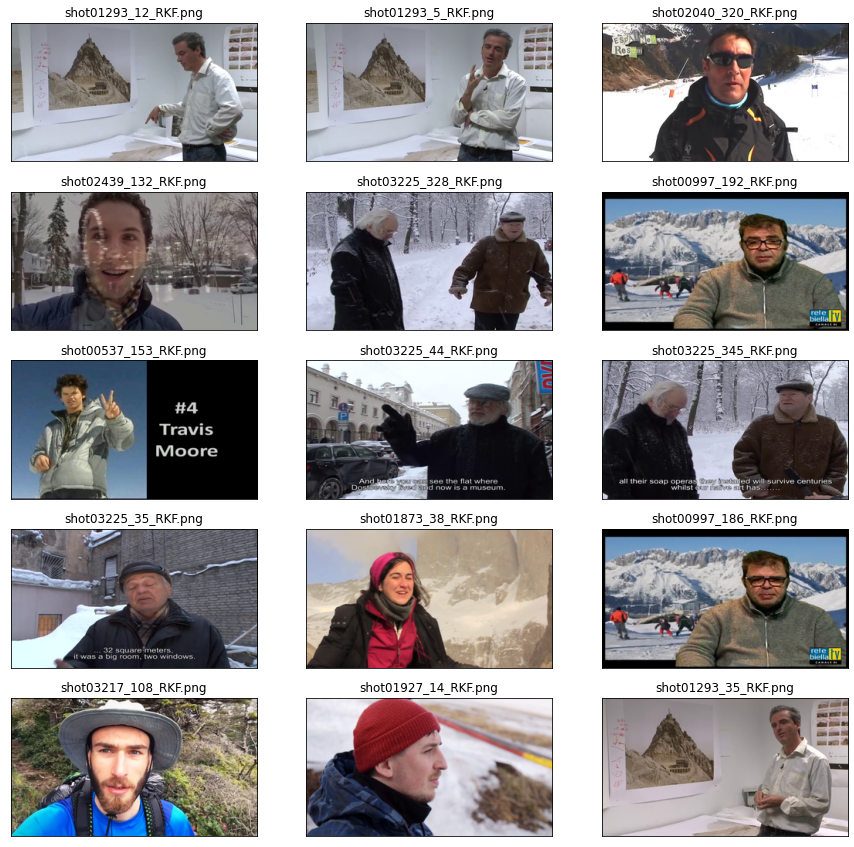

In [75]:
plot_figure(temp)

#### Compute features

In [7]:
# data.encode_dataset(entire_dataset=True)
# data.load_dataset()
print("Features: ", clip.features==None)

Features:  True


In [8]:
clip.load_features()
print("Features: ", len(clip.features))

Loading feature files ...


100%|██████████| 29218/29218 [00:15<00:00, 1838.64it/s]


Features:  467488


Time:  0.9499270915985107
Length of features:  467488


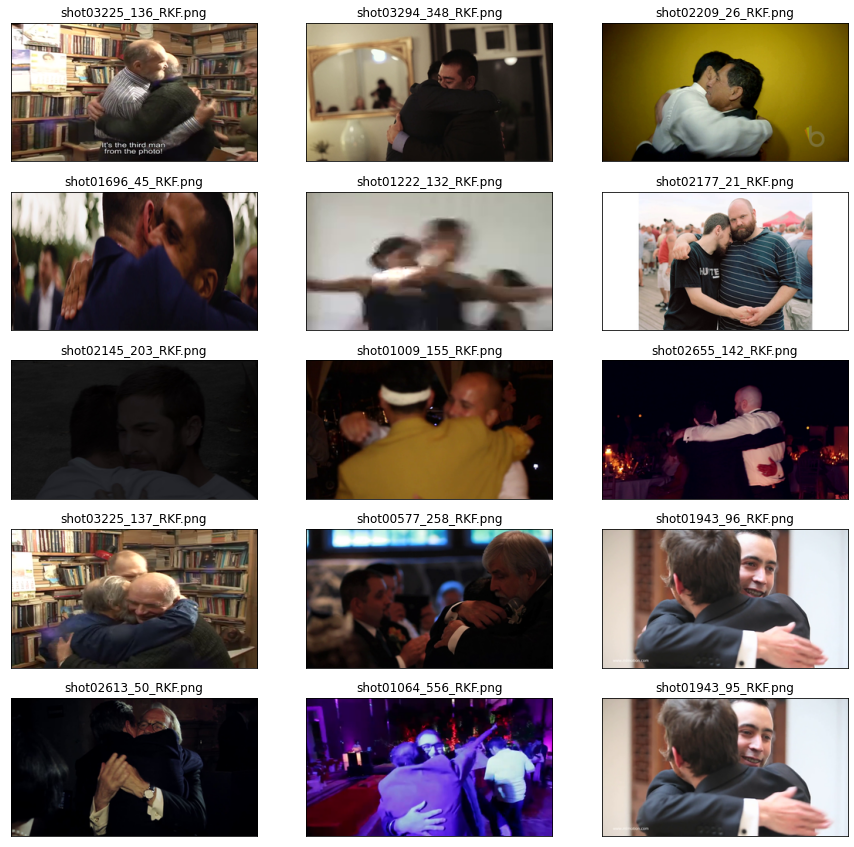

In [9]:
import time
begin = time.time()
query = "two men hugging"
best_images = clip.search_query(query, num_matches=500, ss_type='other')
end = time.time()
print("Time: ", end - begin)
print("Length of features: ", len(clip.features))
# print("Best images: ", best_images)
clip.display_results(best_images[:15])

In [10]:
# best_images

In [19]:
# best_images

In [9]:
with open('sample.txt', 'w') as f:
    for item in best_images:
        f.write("%s\n" % item['path'])

In [10]:
pwd

'/home/ntnhu/DCU/projects/VBS2022/CLIPsearch'

In [9]:
temp = data.image_names[0].split('/')[-1]
# x = temp.split('/')[-1]
x = temp.split('_')[-3]
x[4:]

'00001'

Length of features:  10000
Best images:  [{'filename': 'shot03956_148_RKF.png', 'dataset': None, 'video': '03956', 'shot': '148'}, {'filename': 'shot05604_75_RKF.png', 'dataset': None, 'video': '05604', 'shot': '75'}, {'filename': 'shot00126_46_RKF.png', 'dataset': None, 'video': '00126', 'shot': '46'}, {'filename': 'shot02473_57_RKF.png', 'dataset': None, 'video': '02473', 'shot': '57'}, {'filename': 'shot04771_90_RKF.png', 'dataset': None, 'video': '04771', 'shot': '90'}, {'filename': 'shot03437_132_RKF.png', 'dataset': None, 'video': '03437', 'shot': '132'}, {'filename': 'shot03247_227_RKF.png', 'dataset': None, 'video': '03247', 'shot': '227'}, {'filename': 'shot06821_414_RKF.png', 'dataset': None, 'video': '06821', 'shot': '414'}, {'filename': 'shot07466_47_RKF.png', 'dataset': None, 'video': '07466', 'shot': '47'}, {'filename': 'shot07261_83_RKF.png', 'dataset': None, 'video': '07261', 'shot': '83'}, {'filename': 'shot06825_70_RKF.png', 'dataset': None, 'video': '06825', 'shot': 

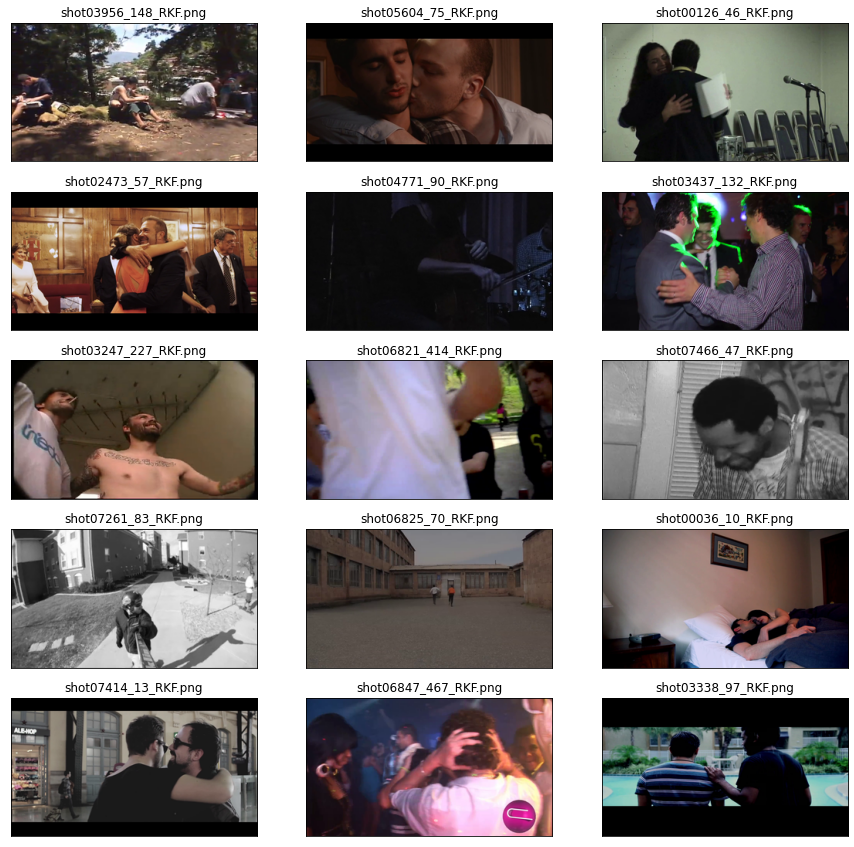

In [10]:
query = "two men hugging"
best_images = data.search_query(query, num_matches=30)
print("Length of features: ", len(data.features))
print("Best images: ", best_images)
data.display_results(best_images[:])

### Resize keyframes

In [2]:
resized_path = osp.join(DATASET_MASTER_PATH, 'resized_keyframes')
original_path = osp.join(DATASET_MASTER_PATH, 'keyframes/extract/00001')

In [3]:
filename_list = os.listdir(original_path)
len(filename_list)

114

In [4]:
img_path = filename_list[0]
img_path = osp.join(original_path, img_path)

In [6]:
img_path.split('/')

['',
 'mnt',
 'SEAGATE',
 'root',
 'V3C1',
 'keyframes',
 'extract',
 '00001',
 'shot00001_44_RKF.png']

In [32]:
import cv2
def resize_image(img_path, scale_percent=50, rename=False, filename=None):
    src_img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    scale_percent = scale_percent

    #calculate the 50 percent of original dimensions
    width = int(src_img.shape[1] * scale_percent / 100)
    height = int(src_img.shape[0] * scale_percent / 100)
    dsize = (width, height)

    # resize image
    output = cv2.resize(src_img, dsize)
    
    if rename:
        cv2.imwrite(filename, output)
        return
        
    return output



In [33]:
resize_image(img_path, 25, rename=True, filename='abc.png')

In [28]:
output = resize_image(filename, 25)

In [29]:
output.shape

(180, 320, 3)